In [2]:
import pandas as pd

df = pd.read_excel("finaldf_partner_imp_1k.xlsx", index_col=False)
df.drop(columns=["Column1","index_x","index_y","revenue_to_Revenue_ratio","symbol", "calendarYear", "marketCap"], axis = 1, inplace = True)
df.head()

,Label,Partner,totalCurrentAssets_to_totalAssets_ratio,totalNonCurrentAssets_to_totalAssets_ratio,totalCurrentLiabilities_to_totalLiabilities_ratio,totalNonCurrentLiabilities_to_totalLiabilities_ratio,costOfRevenue_to_Revenue_ratio,grossProfit_to_Revenue_ratio,operatingExpenses_to_Revenue_ratio,ebitda_to_Revenue_ratio,...,investmentsInPropertyPlantAndEquipment_to_Revenue_ratio,commonStockIssued_to_Revenue_ratio,debtRepayment_to_Revenue_ratio,debtToEquity,debtToAssets,daysOfInventoryOnHand,workingCapital_to_revenue_Ratio,employee_revenue_ratio,Number of Product Segments,Number of Geo Segments
0,2,263.0,52.543267,47.456733,65.918286,34.081714,72.963421,27.036579,19.487096,7.270342,...,-2030.050116,0.669815,-1346.597918,0.469952,0.149550,80.392441,16.931293,0.000226,3,3
1,2,263.0,50.142358,49.857642,62.165864,37.834136,74.850994,25.149006,19.476318,15.567115,...,-1607.798758,2.513364,-993.654078,0.680004,0.202260,92.362922,15.423757,0.000234,3,3
2,2,263.0,47.520648,52.479352,68.611247,31.388753,75.073354,24.926646,17.734589,13.704331,...,-294.934587,166.070145,164.719169,0.720136,0.225146,96.741438,7.261509,0.000242,3,3
3,2,263.0,47.422916,52.577084,72.094450,27.905550,75.286739,24.713261,17.837664,12.844175,...,-354.411168,201.877065,200.226144,0.447787,0.177048,73.346435,7.006217,0.000251,4,3
4,2,263.0,47.904926,52.095074,75.492625,24.507375,73.459118,26.540882,18.771963,12.410075,...,-636.935020,362.817037,359.850068,0.206887,0.096555,77.153320,10.813318,0.000259,4,3


In [3]:
columns_to_scale = [ "totalCurrentAssets_to_totalAssets_ratio", "totalNonCurrentAssets_to_totalAssets_ratio", "totalCurrentLiabilities_to_totalLiabilities_ratio",
                    "totalNonCurrentLiabilities_to_totalLiabilities_ratio", "costOfRevenue_to_Revenue_ratio",
                    "grossProfit_to_Revenue_ratio", "operatingExpenses_to_Revenue_ratio", "ebitda_to_Revenue_ratio",
                    "commonStockIssued_to_Revenue_ratio","debtRepayment_to_Revenue_ratio", "debtToEquity", 
                    "debtToAssets", "workingCapital_to_revenue_Ratio", "employee_revenue_ratio"]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pylab as plt
import numpy as np

# Separate explanatory (X) and target (y) variables
X = df.copy()
y = X.pop("Label")

# Feature selection
selector = SelectKBest(f_classif, k=10)  # Adjust k as needed
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Create a DataFrame with the selected features
X_new_df = pd.DataFrame(X_new, columns=selected_features)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new_df)

# Create a DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)


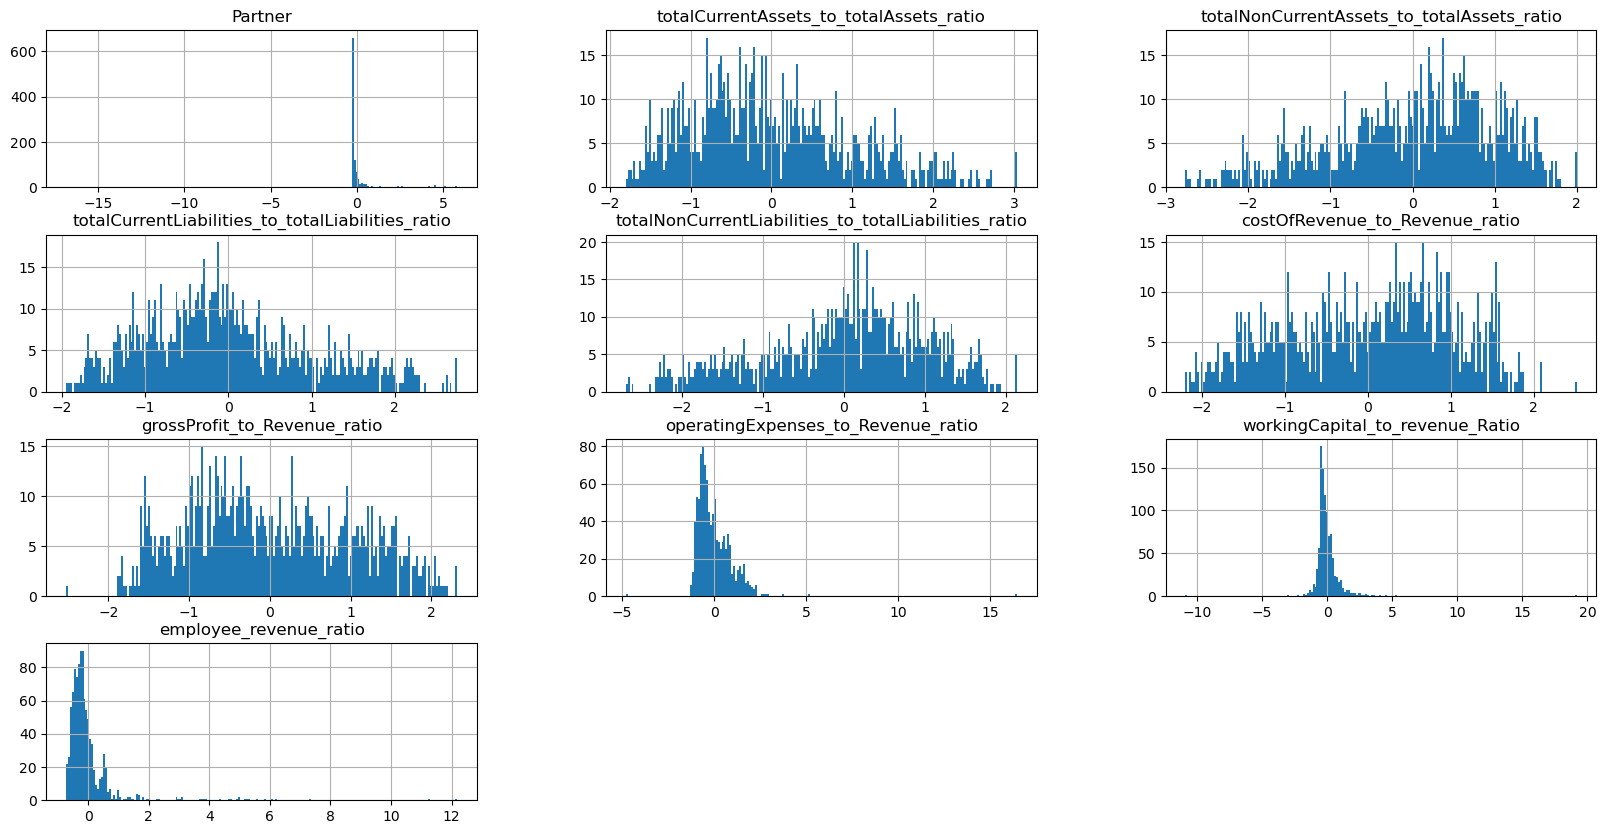

In [12]:
plt.rcParams["figure.figsize"] = (20,10)
X_scaled_df.select_dtypes(exclude="bool").hist(bins=200)
plt.show()

In [32]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_scaled_df and y are defined

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Define stratified k-fold cross-validator
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(nb_classifier, X_scaled_df, y, cv=strat_k_fold, scoring='accuracy')

# Print the cross-validation scores
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')
print(f'Standard deviation of cross-validation accuracy: {cv_scores.std():.4f}')

# Split the data into training and testing sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Train the model on the entire training set
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
y_pred_proba = nb_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Final test set accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))


Cross-validation accuracy scores: [0.635 0.585 0.57  0.56  0.625]
Mean cross-validation accuracy: 0.5950
Standard deviation of cross-validation accuracy: 0.0298
Final test set accuracy: 0.6100
              precision    recall  f1-score   support

           1       0.57      0.78      0.66        50
           2       0.62      0.44      0.52        52
           3       0.88      0.39      0.54        57
           4       0.54      0.93      0.68        41

    accuracy                           0.61       200
   macro avg       0.65      0.63      0.60       200
weighted avg       0.67      0.61      0.59       200



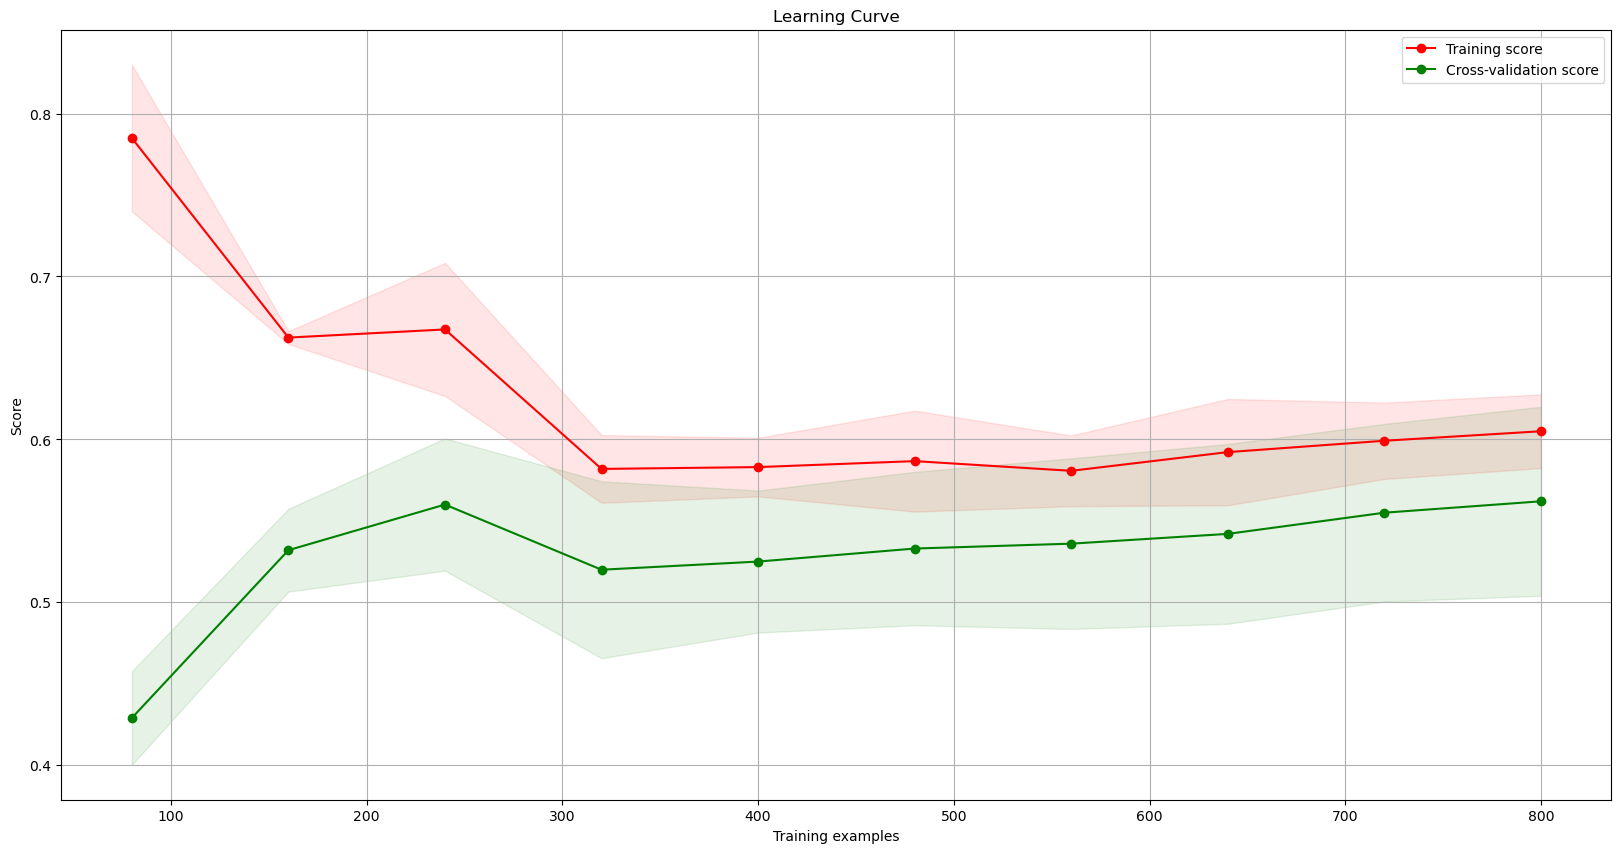

In [34]:

from sklearn.model_selection import learning_curve
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(nb_classifier, X_scaled_df, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.grid()
plt.show()

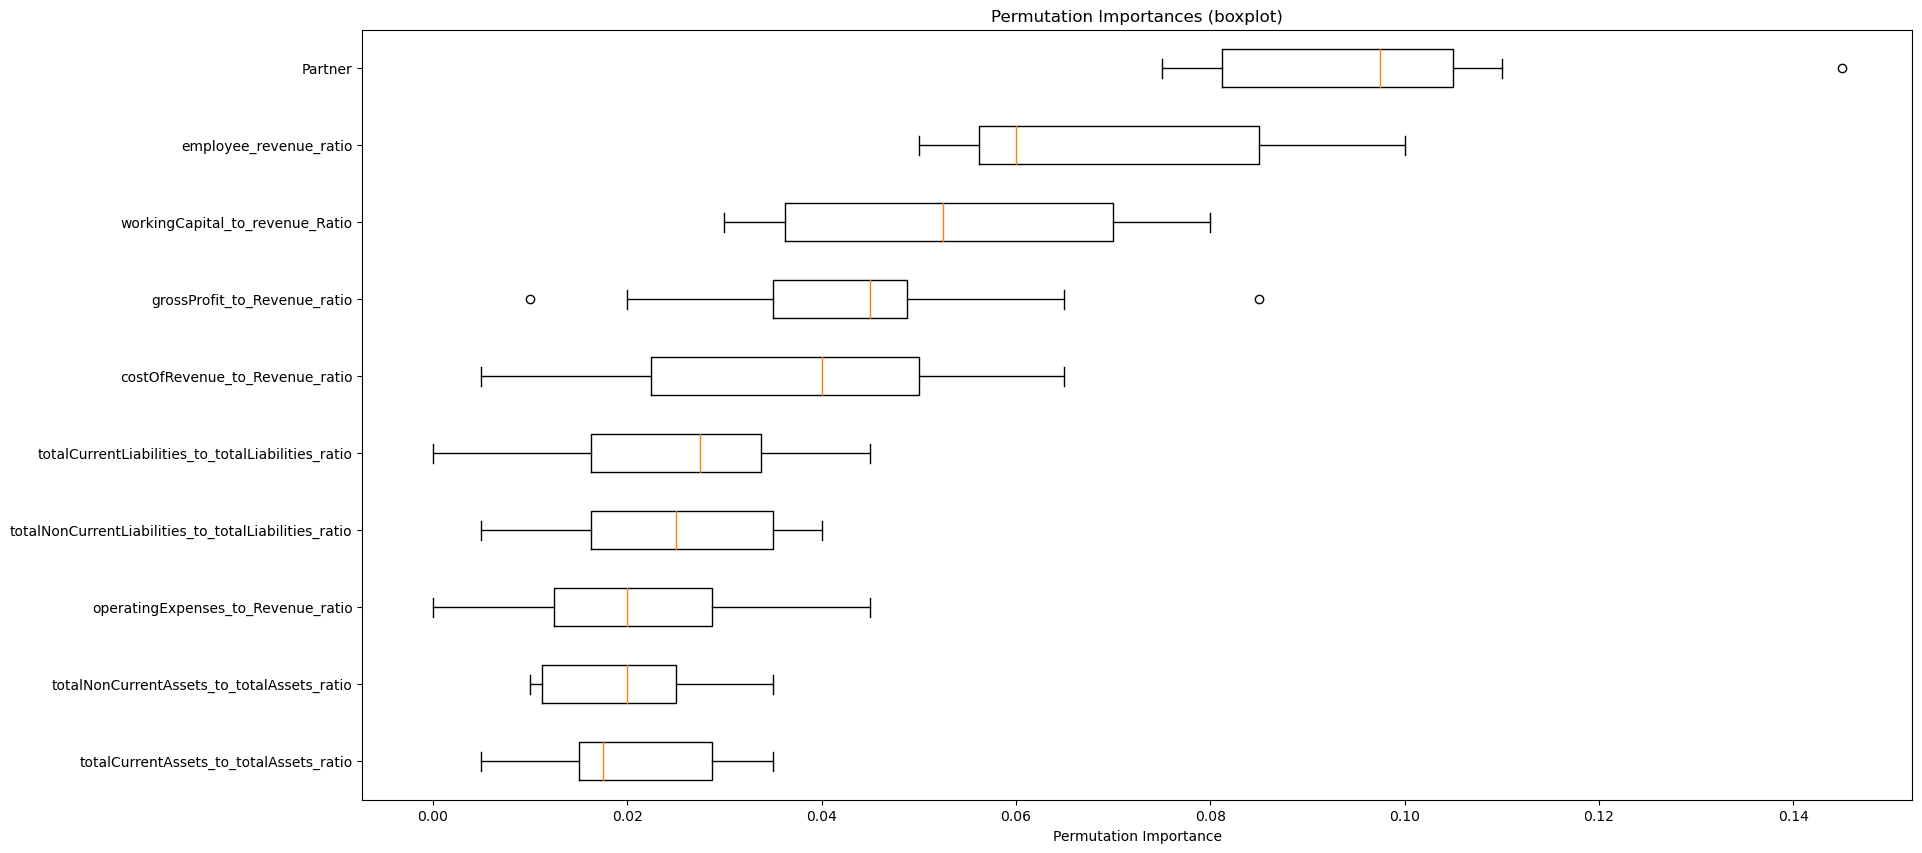

In [33]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(nb_classifier, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = perm_importance.importances_mean.argsort()

plt.rcParams["figure.figsize"] = (20, 10)
fig, ax = plt.subplots()
ax.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=selected_features[sorted_idx])
ax.set_title("Permutation Importances (boxplot)")
ax.set_xlabel("Permutation Importance")
plt.show()